# Updated Event Plotting

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Load Geometry Files

In [3]:
full_tank_geo_file_path = '/fast_scratch/WatChMaL/data/mPMT_full_geo.npz'
full_tank_geofile = np.load(full_tank_geo_file_path, allow_pickle=True)

In [4]:
geo_path = '/fast_scratch/WatChMaL/data/geo_mPMTshort.npz'
geofile = np.load(geo_path, allow_pickle=True)

# Load Full Tank Data and Find Parameters

In [5]:
full_tank_tubes = full_tank_geofile[ 'tube_no' ]

full_tank_tube_xyz = full_tank_geofile[ 'position' ]
full_tank_tube_x   = full_tank_tube_xyz[:,0]
full_tank_tube_y   = full_tank_tube_xyz[:,1]
full_tank_tube_z   = full_tank_tube_xyz[:,2]
R =  (full_tank_tube_x.max() - full_tank_tube_x.min())/2.0

full_tank_tube_dir = full_tank_geofile[ 'orientation']

# Load Short Tank Data and Find Parameters

In [6]:
tubes = geofile[ 'tube_no' ]

tube_xyz = geofile[ 'position' ]
tube_x   = tube_xyz[:,0]
tube_y   = tube_xyz[:,1]
tube_z   = tube_xyz[:,2]

R =  (tube_x.max() - tube_x.min())/2.0

tube_dir = geofile[ 'orientation']

In [7]:
print("Short tank dimensions: ")
print(tube_x.max())
print(tube_y.max())
print(tube_z.max())
print("R: ", R)

Short tank dimensions: 
399.0980529785156
296.4490661621094
399.0980529785156
R:  399.0980529785156


# Display 3D Plots

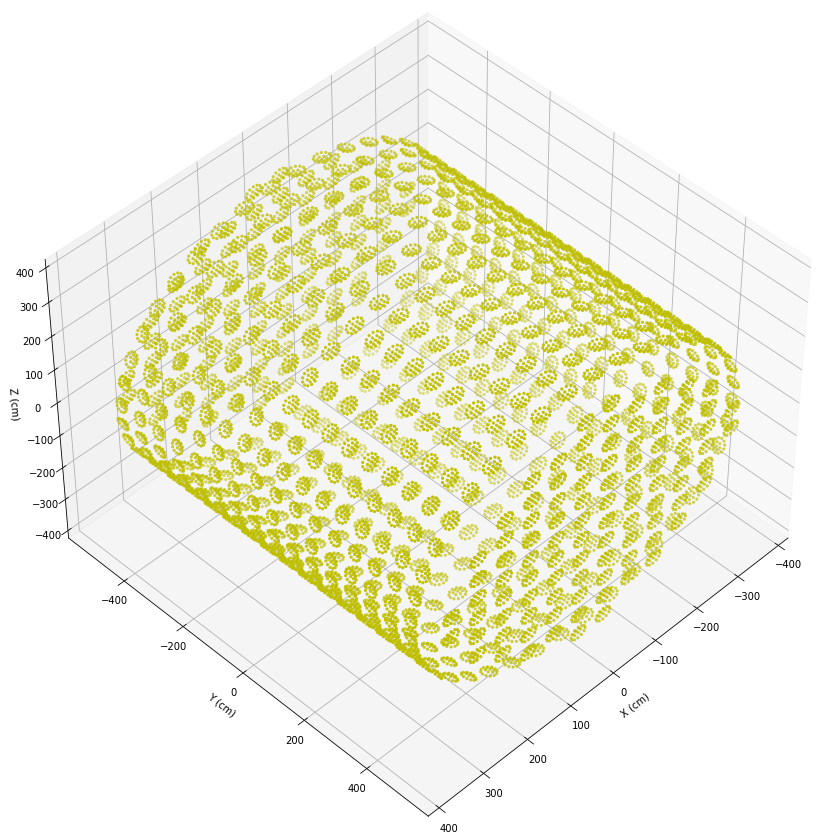

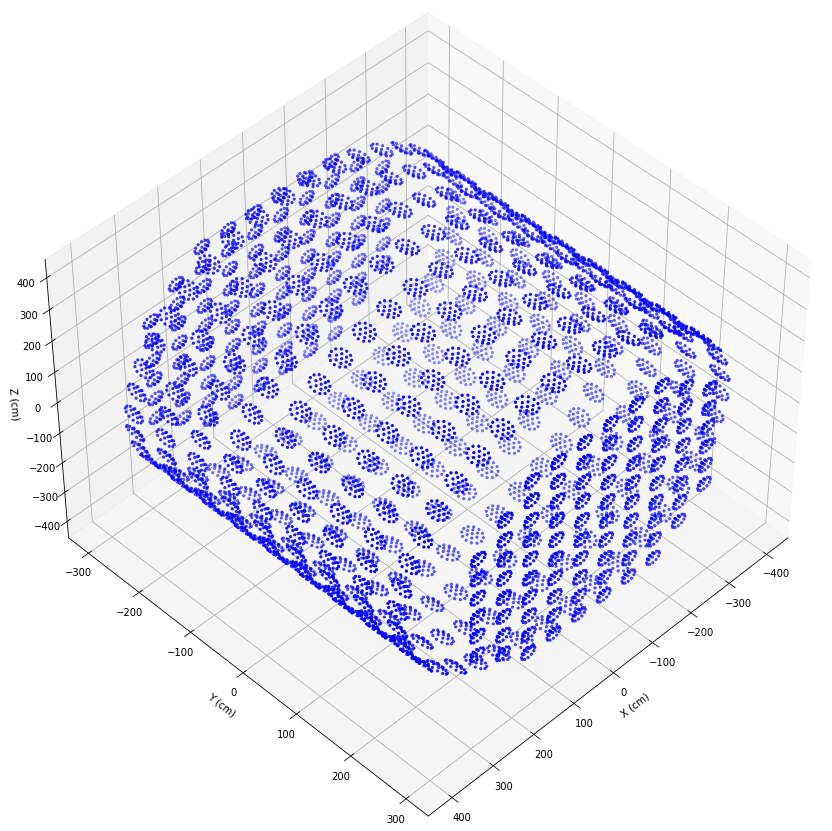

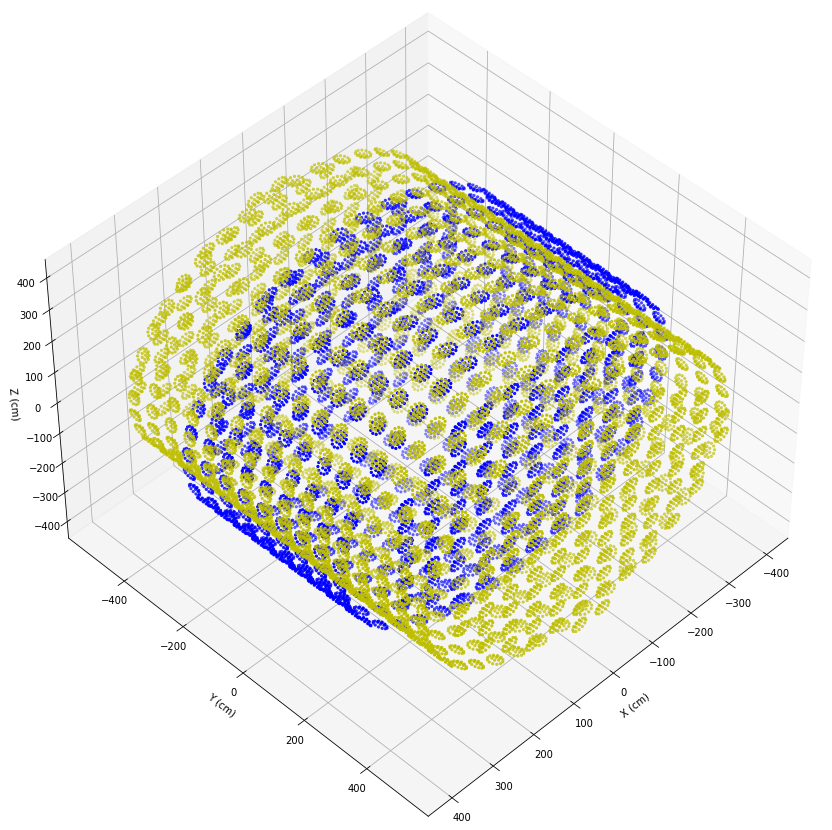

In [8]:
fig = plt.figure(figsize=[15,15])
ax = fig.add_subplot(111, projection='3d')
ax.scatter( full_tank_tube_x, full_tank_tube_y, full_tank_tube_z, marker='.', c='y', label='full'  )
ax.set_xlabel('X (cm)')
ax.set_ylabel('Y (cm)')
ax.set_zlabel('Z (cm)')
ax.view_init(elev=45.0, azim=45.0)
plt.show()

fig = plt.figure(figsize=[15,15])
ax = fig.add_subplot(111, projection='3d')
ax.scatter( tube_x, tube_y, tube_z, marker='.', c='b', label='short'  )
ax.set_xlabel('X (cm)')
ax.set_ylabel('Y (cm)')
ax.set_zlabel('Z (cm)')
ax.view_init(elev=45.0, azim=45.0)
plt.show()


fig = plt.figure(figsize=[15,15])
ax = fig.add_subplot(111, projection='3d')
ax.scatter( tube_x, tube_y, tube_z, marker='.', c='b', label='short'  )
ax.scatter( full_tank_tube_x, full_tank_tube_y, full_tank_tube_z, marker='.', c='y', label='full'  )
ax.set_xlabel('X (cm)')
ax.set_ylabel('Y (cm)')
ax.set_zlabel('Z (cm)')
ax.view_init(elev=45.0, azim=45.0)
plt.show()

# Define Mappings

In [9]:
import sys
sys.path.append("../..")

In [17]:
from WatChMaL_analysis.WatChMaL.analysis.event_plot_utils import PMT_to_flat_cylinder_mapping, PMT_to_flat_cylinder_map_positive
from WatChMaL_analysis.WatChMaL.analysis.event_plot_utils import get_event_data_from_index, EventDisplay, pmts_per_mpmt

In [18]:
PMTFlatMapping = PMT_to_flat_cylinder_mapping( tubes, tube_xyz )
PMTFlatMapPositive = PMT_to_flat_cylinder_map_positive( tubes, tube_xyz )

# Test Short Tank Plotting

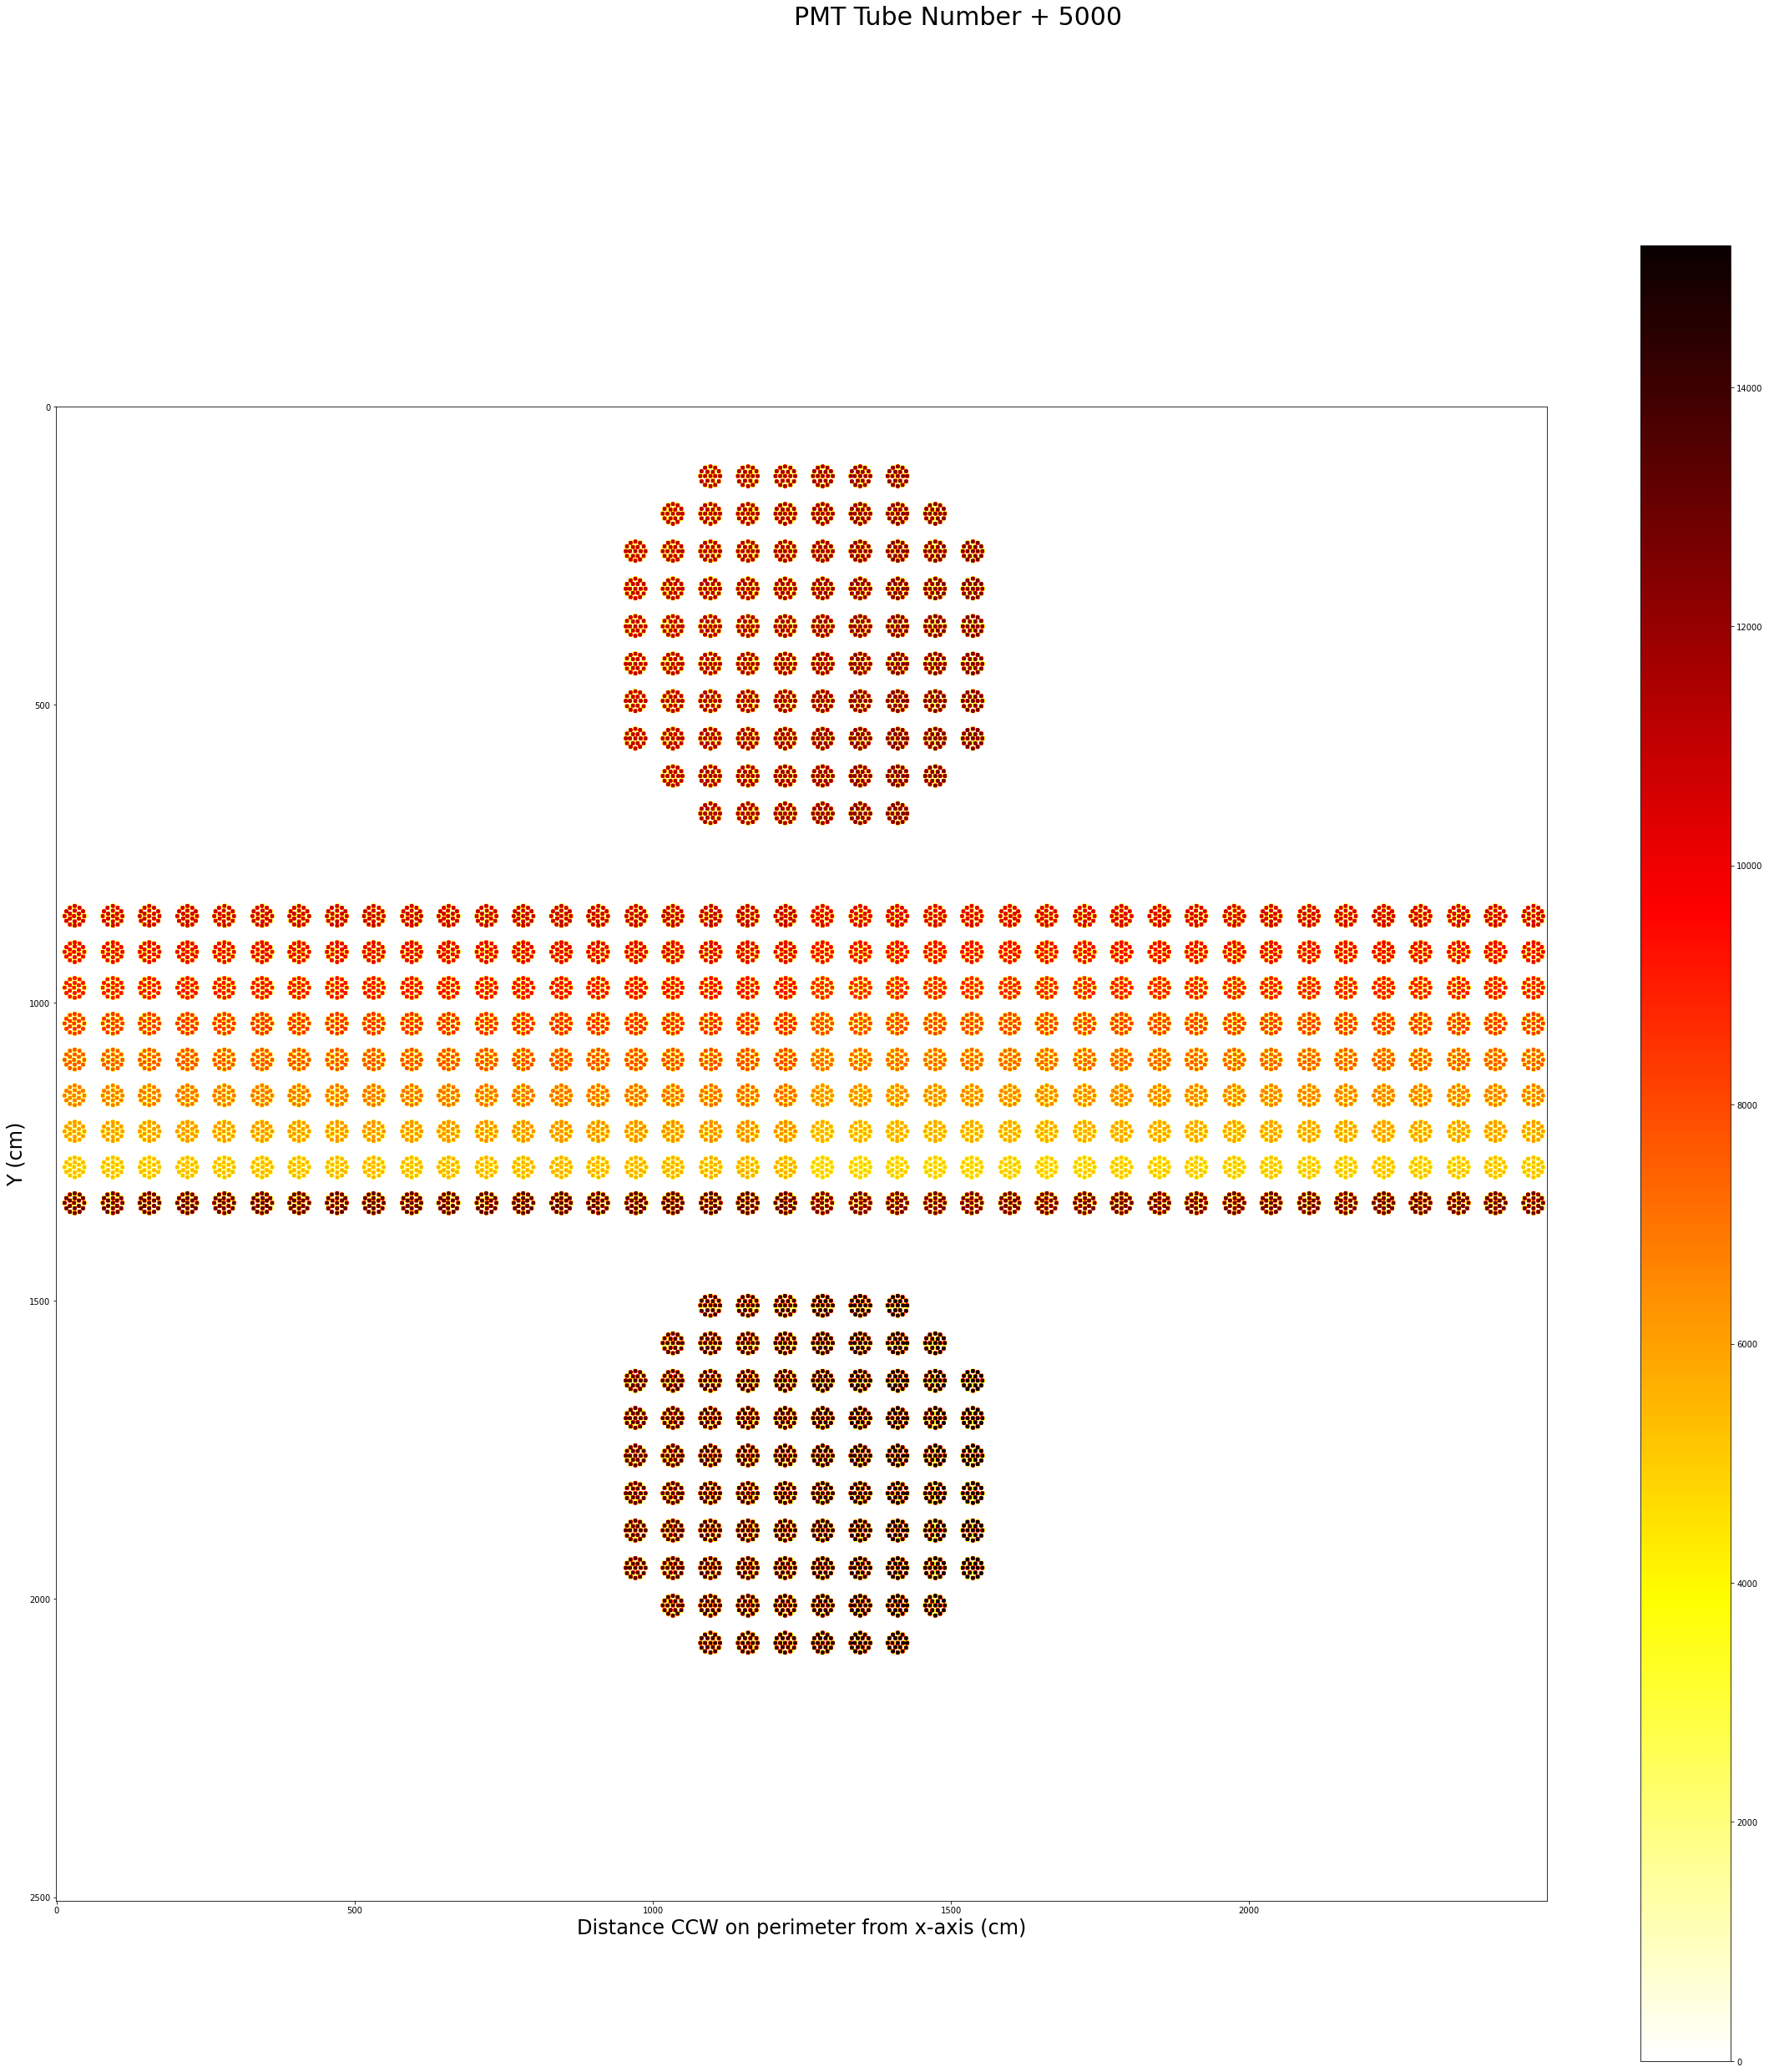

In [19]:
fig = plt.figure(figsize=[40,40]) 

preimage = np.zeros( [2506, 2496 + 3 + 1] )
for tube in PMTFlatMapPositive:
    for dx in range(-3,4):
        for dy in range(-3,4):
            if abs(dx)==3 and abs(dy)==3:
                continue
            preimage[ PMTFlatMapPositive[tube][1]+dx, PMTFlatMapPositive[tube][0]+dy ] = tube + 5000
plt.imshow( preimage )
fig.suptitle('PMT Tube Number + 5000',fontsize=30)
plt.xlabel('Distance CCW on perimeter from x-axis (cm)', fontsize=24)
plt.ylabel('Y (cm)', fontsize=24)
plt.set_cmap('hot_r')
plt.colorbar()

# Test Event Plotting

In [20]:
original_data_path = "/fast_scratch/WatChMaL/data/IWCD_mPMT_Short_oldreflector_e-mu-gamma_E0to1000MeV_digihits.h5"
data_file = h5py.File(original_data_path, "r")


hdf5_hit_pmt    = data_file["hit_pmt"]
hdf5_hit_time   = data_file["hit_time"]
hdf5_hit_charge = data_file["hit_charge"]


hit_pmt    = np.memmap(original_data_path, mode="r", shape=hdf5_hit_pmt.shape,
                                    offset=hdf5_hit_pmt.id.get_offset(), dtype=hdf5_hit_pmt.dtype)

hit_time   = np.memmap(original_data_path, mode="r", shape=hdf5_hit_time.shape,
                                    offset=hdf5_hit_time.id.get_offset(), dtype=hdf5_hit_time.dtype)

hit_charge = np.memmap(original_data_path, mode="r", shape=hdf5_hit_charge.shape,
                                    offset=hdf5_hit_charge.id.get_offset(), dtype=hdf5_hit_charge.dtype)

In [21]:
event_hits_index = np.append(data_file["event_hits_index"], hdf5_hit_pmt.shape[0]).astype(np.int64)

mpmt_positions_file = '/data/WatChMaL/data/IWCDshort_mPMT_image_positions.npz'
mpmt_positions   = np.load(mpmt_positions_file)['mpmt_image_positions']

data_size = np.max(mpmt_positions, axis=0) + 1
n_channels = pmts_per_mpmt
data_size = np.insert(data_size, 0, n_channels)

In [ ]:
# 0, 12, 14

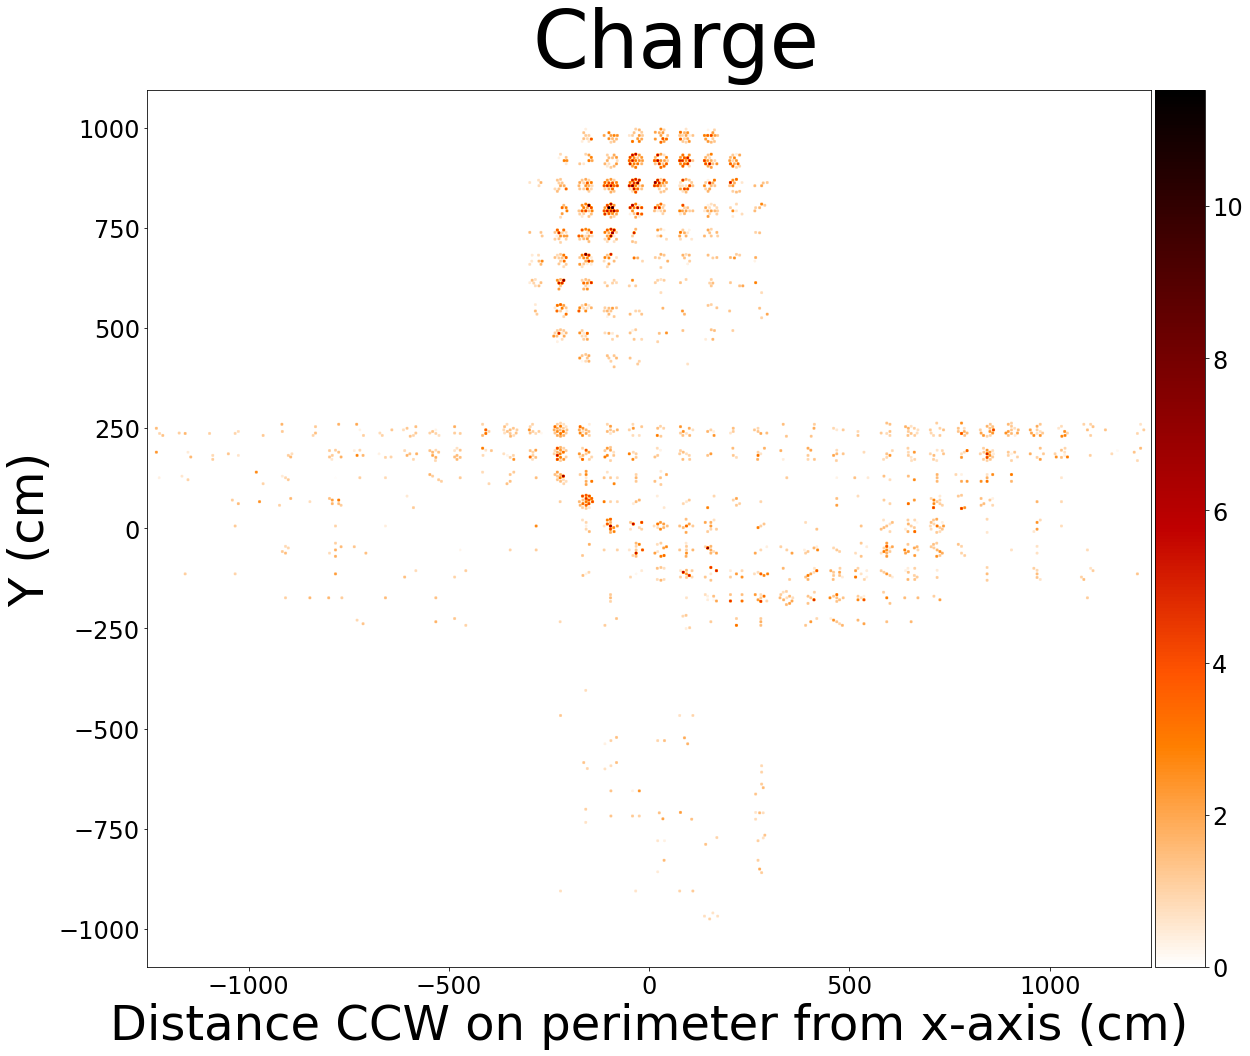

In [81]:
test_event_pmts, test_event_charges = get_event_data_from_index(12, hit_pmt, hit_charge, event_hits_index, data_size, mpmt_positions)
EventDisplay(test_event_pmts, test_event_charges, PMTFlatMapPositive, figsize=[15,15])

In [84]:
labels = np.array(data_file['labels'])
print(labels[12])

1
